findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


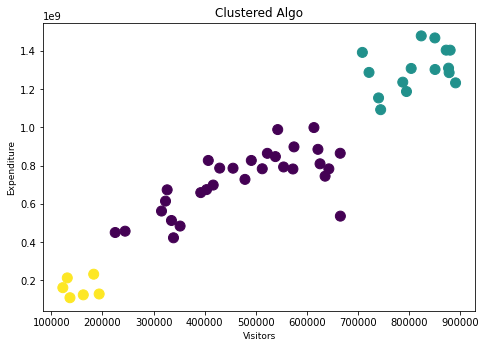

In [1]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,6
%matplotlib inline
data = pd.read_csv('kmeansD - Sheet1 (2).csv')
dbscan_data = data[['Visitors','Expenditure']]
dbscan_data = dbscan_data.values.astype('float32',copy = False)
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
model = DBSCAN(eps = 0.55,min_samples = 5,metric = 'euclidean').fit(dbscan_data)
clusters_df = data[model.labels_ != -1]
outliers_df = data[model.labels_ == -1]
colors = model.labels_
colors_clusters = colors[colors != -1]
#colors_clusters=(0,1,2)
color_outliers = 'black'
clusters = Counter(model.labels_)
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.scatter(clusters_df['Visitors'],clusters_df['Expenditure'],c = colors_clusters,s=100)
#ax.scatter(outliers_df['Expenditure'],outliers_df['Visitors'],c = colors_clusters, edgecolors = 'black',s=50)
ax.set_xlabel('Visitors',family = 'Arial', fontsize = 9)
ax.set_ylabel('Expenditure',family = 'Arial', fontsize = 9)
plt.title('Clustered Algo', family = 'Arial', fontsize =12 )
#ax.set_ylim(ymin=0)
#ax.set_xlim(xmin=0)
plt.show()
